In [1]:
import pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error
from   tensorflow import keras
from   math import sqrt
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
#Data Base Import
db=pd.read_excel(r'D:\ToolBox\.py\rep_1\mod_1\TestLab\Test_1.xlsx')

#Data Extraction
y1 = db ["Bressler_1"]
y2 = db ["Bressler_2"]
y3 = db ["Ast"]
x  = db [["b","h","Mux","Muy","Pu","numBarExt","numBarInt","cantBarX","cantBarY","fc","fy"]]

#RMSE def
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

In [3]:
#Split: DataBase into: Training and Testing Data
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2,ytrain3,ytest3 = train_test_split(x,y1,y2,y3,test_size=0.2,random_state=1) 

In [9]:
# Auto-Saving Model Training: Callback ModelCheckpoint
checkpoint = ModelCheckpoint(r'D:\ToolBox\.py\rep_1\models\mdl_checkpoint_cols.keras', monitor='val_loss', save_best_only=True)

In [9]:
# Model: Arquitecture
n1= 40; n2= 40; n3= 40; n4= 40; total_neurons = n1+ n2+ n3+ n4; total_layers = 4

input_layer = tf.keras.layers.Input(shape=(xtrain.shape[1],))
hidden_layer = tf.keras.layers.Dense(n1, activation="relu")(input_layer)
hidden_layer = tf.keras.layers.Dense(n2, activation="relu")(hidden_layer)
hidden_layer = tf.keras.layers.Dense(n3, activation="relu")(hidden_layer)
hidden_layer = tf.keras.layers.Dense(n4, activation="relu")(hidden_layer)

output1 = tf.keras.layers.Dense(1, name="Bressler_1")(hidden_layer)  # Primera salida
output2 = tf.keras.layers.Dense(1, name="Bressler_2")(hidden_layer)  # Segunda salida
output3 = tf.keras.layers.Dense(1, name="Ast")(hidden_layer)  # Tercera salida

mdl = tf.keras.Model(inputs=input_layer, outputs=[output1, output2, output3])

In [11]:
# Times the model will be trained
epochs = 5

In [5]:
total_epochs = 0

In [18]:
# Stats: Model 
mdl.summary()
print(mdl.weights)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 40)        │        480 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 40)        │      1,640 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 40)        │      1,640 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 40)        │      1,640 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Bressler_1 (Dense)  │ (None, 1)         │         41 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Bressler_2 (Dense)  │ (None, 1)         │         41 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Ast (Dense)         │ (None, 1)         │         41 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,523 (21.57 KB)

 Trainable params: 5,523 (21.57 KB)

 Non-trainable params: 0 (0.00 B)

[<KerasVariable shape=(11, 40), dtype=float32, path=dense_8/kernel>, <KerasVariable shape=(40,), dtype=float32, path=dense_8/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=dense_9/kernel>, <KerasVariable shape=(40,), dtype=float32, path=dense_9/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=dense_10/kernel>, <KerasVariable shape=(40,), dtype=float32, path=dense_10/bias>, <KerasVariable shape=(40, 40), dtype=float32, path=dense_11/kernel>, <KerasVariable shape=(40,), dtype=float32, path=dense_11/bias>, <KerasVariable shape=(40, 1), dtype=float32, path=Bressler_1/kernel>, <KerasVariable shape=(1,), dtype=float32, path=Bressler_1/bias>, <KerasVariable shape=(40, 1), dtype=float32, path=Bressler_2/kernel>, <KerasVariable shape=(1,), dtype=float32, path=Bressler_2/bias>, <KerasVariable shape=(40, 1), dtype=float32, path=Ast/kernel>, <KerasVariable shape=(1,), dtype=float32, path=Ast/bias>]


In [6]:
# Load Model
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))
# Cargar el modelo guardado
mdl = load_model(r'D:\ToolBox\.py\rep_1\models\mdl_checkpoint_cols.keras', custom_objects={'rmse': rmse})

In [7]:
# Model Conpiling
mdl.compile(optimizer='adam', loss=rmse ,metrics={'Bressler_1': 'accuracy', 'Bressler_2': 'accuracy','Ast': 'accuracy'})

In [10]:
# Model Parameters Training 
mdl_fit = mdl.fit(xtrain, {"Bressler_1": ytrain1, "Bressler_2": ytrain2, "Ast": ytrain3},
    epochs=epochs,
    verbose=True, 
    validation_split=0.05,
    callbacks=[checkpoint])
total_epochs += epochs
total_epochs

Epoch 1/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Ast_accuracy: 0.0000e+00 - Bressler_1_accuracy: 0.8831 - Bressler_2_accuracy: 0.9015 - loss: 3.2554 - val_Ast_accuracy: 0.0000e+00 - val_Bressler_1_accuracy: 0.9235 - val_Bressler_2_accuracy: 0.9400 - val_loss: 1.8250
Epoch 2/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Ast_accuracy: 0.0000e+00 - Bressler_1_accuracy: 0.9018 - Bressler_2_accuracy: 0.9256 - loss: 3.1627 - val_Ast_accuracy: 0.0000e+00 - val_Bressler_1_accuracy: 0.8910 - val_Bressler_2_accuracy: 0.9555 - val_loss: 5.2576
Epoch 3/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Ast_accuracy: 0.0000e+00 - Bressler_1_accuracy: 0.9070 - Bressler_2_accuracy: 0.9316 - loss: 2.4683 - val_Ast_accuracy: 0.0000e+00 - val_Bressler_1_accuracy: 0.9195 - val_Bressler_2_accuracy: 0.9515 - val_loss: 1.4285
Epoch 4/20
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Ast_accuracy: 0.0000e+00 - Bressler_1_accuracy: 0.9038 - Bressler_2_accuracy: 0.9311 - loss: 2.7962 - val_Ast_accuracy: 0.

20

In [39]:
# Stats: Model Parameters Training 
print(mdl_fit.history)

{'Ast_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Bressler_1_accuracy': [0.8920813202857971, 0.8954784870147705, 0.8889234662055969, 0.8961004614830017, 0.9010765552520752, 0.8980382680892944, 0.899043083190918, 0.9102153182029724, 0.9086124300956726, 0.9126315712928772, 0.912822961807251, 0.9159091114997864, 0.9193540811538696, 0.9168660044670105, 0.9239234328269958, 0.9241626858711243, 0.9258373379707336, 0.9286602735519409, 0.9265071749687195, 0.9289951920509338], 'Bressler_2_accuracy': [0.9089473485946655, 0.9104306101799011, 0.9064593315124512, 0.9089952111244202, 0.9152392148971558, 0.9151435494422913, 0.9171291589736938, 0.919784665107727, 0.926889955997467, 0.9255024194717407, 0.920741617679596, 0.932894766330719, 0.936244010925293, 0.9284688830375671, 0.9339473843574524, 0.9382535815238953, 0.9371770620346069, 0.9404545426368713, 0.9401196241378784, 0.9424641132354736], 'loss': [3.8716228008270264, 3.7487332

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


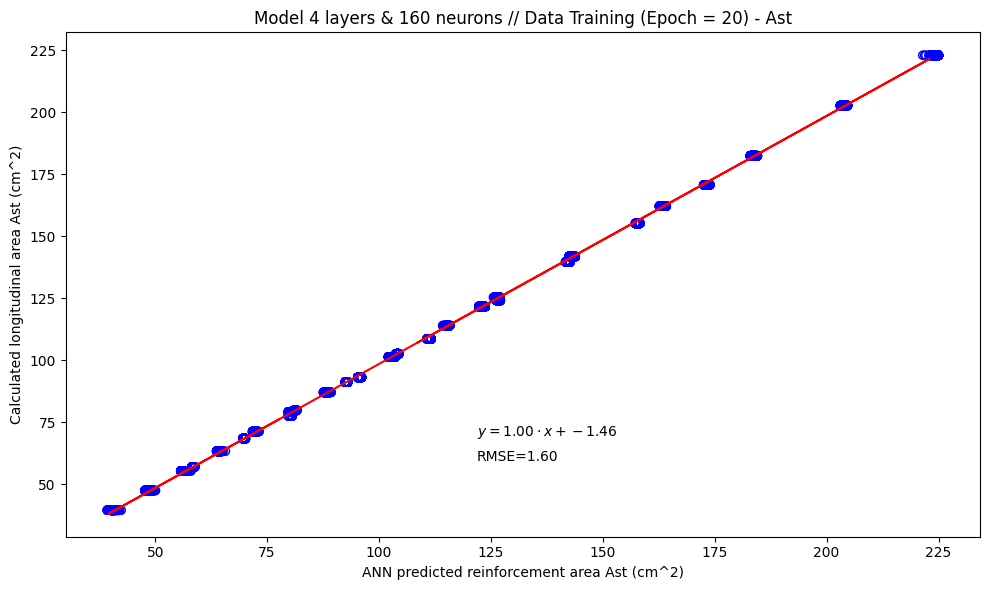

In [12]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
predictions = mdl.predict(xtrain)
n1= 40; n2= 40; n3= 40; n4= 40; total_neurons = n1+ n2+ n3+ n4;total_layers = 4

# Las predicciones serán una lista de arrays, uno por cada salida
ypred1 = predictions[0].flatten()  # Predicciones para Bressler_1
ypred2 = predictions[1].flatten()  # Predicciones para Bressler_2
ypred3 = predictions[2].flatten()  # Predicciones para Ast

def rmse(ytrue, ypred):
    return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

RMSE = rmse(ytrain3, ypred3)

# Crear figura y subplot
fig, axs = plt.subplots(figsize=(10, 6))

# Calcular la pendiente y la intersección de la línea de regresión lineal
m3, b3 = np.polyfit(ypred3, ytrain3, 1)

# Gráfico scatter
axs.scatter(ypred3, ytrain3, facecolors='none', edgecolors='b')
axs.plot(ytrain3, m3 * ytrain3 + b3, color='red')
axs.text(0.45, 0.2, f'$y = {m3:.2f} \\cdot x + {b3:.2f}$', fontsize=10, transform=axs.transAxes)
axs.text(0.45, 0.15, f'RMSE={RMSE:.2f}', fontsize=10, transform=axs.transAxes)
axs.set_xlabel('ANN predicted reinforcement area Ast (cm^2)')
axs.set_ylabel('Calculated longitudinal area Ast (cm^2)')
axs.set_title(f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - Ast')

# Ajustar diseño de subplot
plt.tight_layout()

# Mostrar el gráfico
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


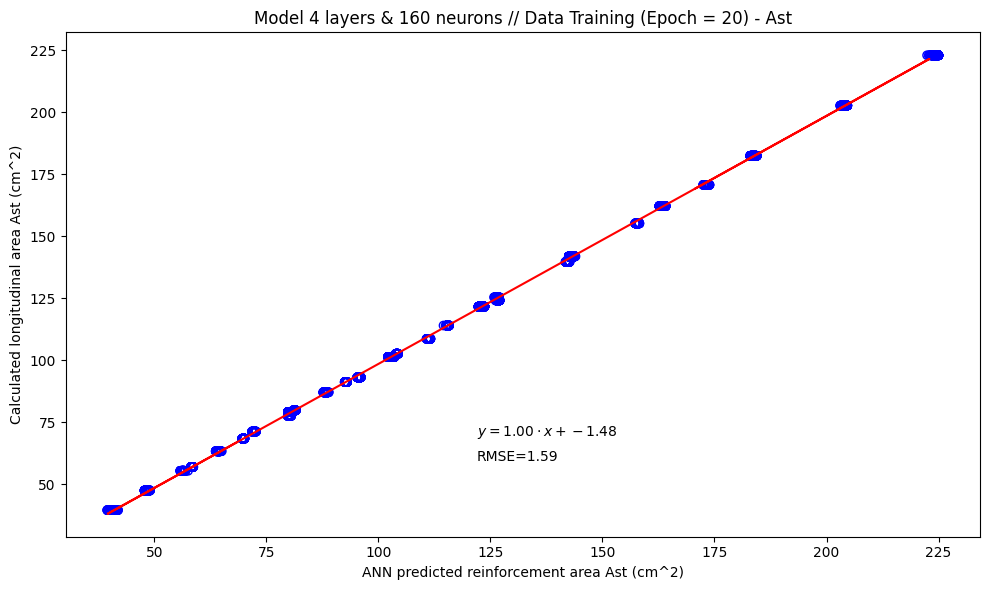

In [13]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
predictions = mdl.predict(xtest)
n1= 40; n2= 40; n3= 40; n4= 40; total_neurons = n1+ n2+ n3+ n4;total_layers = 4

# Las predicciones serán una lista de arrays, uno por cada salida
ypred1 = predictions[0].flatten()  # Predicciones para Bressler_1
ypred2 = predictions[1].flatten()  # Predicciones para Bressler_2
ypred3 = predictions[2].flatten()  # Predicciones para Ast

def rmse(ytrue, ypred):
    return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

RMSE = rmse(ytest3, ypred3)

# Crear figura y subplot
fig, axs = plt.subplots(figsize=(10, 6))

# Calcular la pendiente y la intersección de la línea de regresión lineal
m3, b3 = np.polyfit(ypred3, ytest3, 1)

# Gráfico scatter
axs.scatter(ypred3, ytest3, facecolors='none', edgecolors='b')
axs.plot(ytest3, m3 * ytest3 + b3, color='red')
axs.text(0.45, 0.2, f'$y = {m3:.2f} \\cdot x + {b3:.2f}$', fontsize=10, transform=axs.transAxes)
axs.text(0.45, 0.15, f'RMSE={RMSE:.2f}', fontsize=10, transform=axs.transAxes)
axs.set_xlabel('ANN predicted reinforcement area Ast (cm^2)')
axs.set_ylabel('Calculated longitudinal area Ast (cm^2)')
axs.set_title(f'Model {total_layers} layers & {total_neurons} neurons // Data Training (Epoch = {total_epochs}) - Ast')

# Ajustar diseño de subplot
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
from tensorflow.keras.models import load_model

def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))
# Cargar el modelo guardado
mdl = load_model(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_checkpoint_cols.keras', custom_objects={'rmse': rmse})

In [27]:
import pandas as pd
#Datos de ETABS
b = [30]
h = [40]
Mux = [5]
Muy = [5]
Pu = [80]
numBarExt = [8]
numBarInt = [8]
cantBarX = [9]
cantBarY = [9]
fc = [280]
fy = [4200]

# Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame({
    'b': b,
    'h': h,
    'Mux': Mux,
    'Muy': Muy,
    'Pu': Pu,
    'numBarExt': numBarExt,
    'numBarInt': numBarInt,
    'cantBarX': cantBarX,
    'cantBarY': cantBarY,
    'fc': fc,
    'fy': fy
})

#Evaluación en el Modelo entrenado por ANN
predictions = mdl.predict(data_Etabs)
y_Bressler_1 = predictions[0][0]  # Área de Acero (Bressler_1)
y_Bressler_2 = predictions[1][0]   # Peralte efectivo (d)
y_Ast = predictions[2][0]  # Área de Acero compresión (Bressler_1p)

imprimir = f"La verificación de (Bressler_1) es {y_Bressler_1}, la verificación de Bressler (Bressler_2) es {y_Bressler_2} y el Área de Acero longitudinal (Ast) es {y_Ast}"
print(imprimir)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
La verificación de (Bressler_1) es [1.0318766], la verificación de Bressler (Bressler_2) es [0.9160532] y el Área de Acero longitudinal (Ast) es [138.80275]
